In [49]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima.model import ARIMA as ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Loading the data

In [50]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", end = "2018-01-29", 
                              interval = "1d", group_by = 'ticker', auto_adjust = True)

[*********************100%%**********************]  4 of 4 completed


In [51]:
df_comp = raw_data.copy()

In [52]:
df_comp.head()

Ticker           ^GSPC                                                   \
Price             Open        High         Low       Close       Volume   
Date                                                                      
1994-01-07  467.089996  470.260010  467.029999  469.899994  324920000.0   
1994-01-10  469.899994  475.269989  469.549988  475.269989  319490000.0   
1994-01-11  475.269989  475.279999  473.269989  474.130005  305490000.0   
1994-01-12  474.130005  475.059998  472.140015  474.170013  310690000.0   
1994-01-13  474.170013  474.170013  471.799988  472.470001  277970000.0   

Ticker            ^FTSE                                                \
Price              Open         High          Low        Close Volume   
Date                                                                    
1994-01-07  3401.399902  3446.800049  3398.699951  3446.000000    0.0   
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0   
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0   
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0   
1994-01-13  3380.699951  3383.300049  3356.899902  3360.000000    0.0   

Ticker           ^GDAXI                                                \
Price              Open         High          Low        Close Volume   
Date                                                                    
1994-01-07  2218.959961  2227.639893  2201.820068  2224.949951    0.0   
1994-01-10  2231.840088  2238.010010  2222.000000  2225.000000    0.0   
1994-01-11  2225.429932  2235.610107  2225.179932  2228.100098    0.0   
1994-01-12  2227.120117  2227.790039  2182.060059  2182.060059    0.0   
1994-01-13  2171.500000  2183.709961  2134.100098  2142.370117    0.0   

Ticker             ^N225                                                   
Price               Open          High           Low         Close Volume  
Date                                                                       
1994-01-07  17842.980469  18131.410156  17787.480469  18124.009766    0.0  
1994-01-10  18186.519531  18567.060547  18186.519531  18443.439453    0.0  
1994-01-11  18481.849609  18671.669922  18373.039062  18485.250000    0.0  
1994-01-12  18447.339844  18807.080078  18301.929688  18793.880859    0.0  
1994-01-13  18770.380859  18823.380859  18548.750000  18577.259766    0.0

In [53]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [54]:
df_comp.head()

Ticker           ^GSPC                                                   \
Price             Open        High         Low       Close       Volume   
Date                                                                      
1994-01-07  467.089996  470.260010  467.029999  469.899994  324920000.0   
1994-01-10  469.899994  475.269989  469.549988  475.269989  319490000.0   
1994-01-11  475.269989  475.279999  473.269989  474.130005  305490000.0   
1994-01-12  474.130005  475.059998  472.140015  474.170013  310690000.0   
1994-01-13  474.170013  474.170013  471.799988  472.470001  277970000.0   

Ticker            ^FTSE                                                ...  \
Price              Open         High          Low        Close Volume  ...   
Date                                                                   ...   
1994-01-07  3401.399902  3446.800049  3398.699951  3446.000000    0.0  ...   
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0  ...   
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0  ...   
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0  ...   
1994-01-13  3380.699951  3383.300049  3356.899902  3360.000000    0.0  ...   

Ticker     ^GDAXI         ^N225                                            \
Price      Volume          Open          High           Low         Close   
Date                                                                        
1994-01-07    0.0  17842.980469  18131.410156  17787.480469  18124.009766   
1994-01-10    0.0  18186.519531  18567.060547  18186.519531  18443.439453   
1994-01-11    0.0  18481.849609  18671.669922  18373.039062  18485.250000   
1994-01-12    0.0  18447.339844  18807.080078  18301.929688  18793.880859   
1994-01-13    0.0  18770.380859  18823.380859  18548.750000  18577.259766   

Ticker                    spx          dax         ftse        nikkei  
Price      Volume                                                      
Date                                                                   
1994-01-07    0.0  469.899994  2224.949951  3446.000000  18124.009766  
1994-01-10    0.0  475.269989  2225.000000  3440.600098  18443.439453  
1994-01-11    0.0  474.130005  2228.100098  3413.800049  18485.250000  
1994-01-12    0.0  474.170013  2182.060059  3372.000000  18793.880859  
1994-01-13    0.0  472.470001  2142.370117  3360.000000  18577.259766  

[5 rows x 24 columns]

In [55]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [56]:
df_comp.head()

Ticker,spx,dax,ftse,nikkei
Price,,,,
Date,,,,
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766
1994-01-14,474.910004,2151.050049,3400.600098,18973.699219


## Creating Returns

In [57]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1)*100
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1)*100
df_comp['ret_dax'] = df_comp.dax.pct_change(1)*100
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1)*100

In [58]:
df_comp.head()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei
Price,,,,,,,,
Date,,,,,,,,
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,NaN,NaN,NaN,NaN
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,-0.239860,-0.778935,0.139330,0.226696
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,0.008438,-1.224443,-2.066336,1.669606
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766,-0.358524,-0.355872,-1.818921,-1.152615
1994-01-14,474.910004,2151.050049,3400.600098,18973.699219,0.516435,1.208336,0.405156,2.134004


## NORMALIZED RESULTS

In [59]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

In [60]:
df_comp.head()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
Price,,,,,,,,,,,,
Date,,,,,,,,,,,,
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,-0.239860,-0.778935,0.139330,0.226696,100.000000,100.000000,100.000000,100.000000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,0.008438,-1.224443,-2.066336,1.669606,-3.518009,157.194491,-1483.049430,736.495480
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766,-0.358524,-0.355872,-1.818921,-1.152615,149.471895,45.686963,-1305.474516,-508.440739
1994-01-14,474.910004,2151.050049,3400.600098,18973.699219,0.516435,1.208336,0.405156,2.134004,-215.306731,-155.126650,290.787975,941.350333


## Splitting the Data

In [61]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [62]:
df.head()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
Price,,,,,,,,,,,,
Date,,,,,,,,,,,,
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,-0.239860,-0.778935,0.139330,0.226696,100.000000,100.000000,100.000000,100.000000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,0.008438,-1.224443,-2.066336,1.669606,-3.518009,157.194491,-1483.049430,736.495480
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766,-0.358524,-0.355872,-1.818921,-1.152615,149.471895,45.686963,-1305.474516,-508.440739
1994-01-14,474.910004,2151.050049,3400.600098,18973.699219,0.516435,1.208336,0.405156,2.134004,-215.306731,-155.126650,290.787975,941.350333


In [63]:
df_test.head()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
Price,,,,,,,,,,,,
Date,,,,,,,,,,,,
2013-04-08,1563.069946,7662.640137,6276.899902,13192.589844,0.630274,0.433615,0.050793,2.796948,-262.767008,-55.667711,36.455379,1233.787652
2013-04-09,1568.609985,7637.509766,6313.200195,13192.349609,0.354433,0.578316,-0.327960,-0.001821,-147.766504,-74.244372,-235.383010,-0.803269
2013-04-10,1587.729980,7810.629883,6387.399902,13288.129883,1.218913,1.175311,2.266709,0.726029,-508.176277,-150.886798,1626.860817,320.265374
2013-04-11,1593.369995,7871.629883,6416.100098,13549.160156,0.355225,0.449325,0.780987,1.964387,-148.096629,-57.684530,560.529426,866.528957
2013-04-12,1588.849976,7744.770020,6384.399902,13485.139648,-0.283677,-0.494073,-1.611609,-0.472505,118.267458,63.429227,-1156.682630,-208.431236


## FITTING MODEL

In [64]:
model_ar = ARIMA(df.ftse, order = (1,0,0))
results_ar = model_ar.fit()

## Simple Forecasting

In [65]:
df.tail()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
Price,,,,,,,,,,,,
Date,,,,,,,,,,,,
2013-04-01,1562.170044,7795.310059,6411.700195,12135.019531,-0.447358,0.000000,0.000000,-2.120443,186.507731,-0.000000,0.000000,-935.368371
2013-04-02,1570.250000,7943.870117,6490.700195,12003.429688,0.517226,1.232122,1.905762,-1.084381,-215.636502,-158.180337,1367.802234,-478.341386
2013-04-03,1553.689941,7874.750000,6420.299805,12362.200195,-1.054613,-1.084635,-0.870106,2.988900,439.677916,139.245809,-624.492133,1318.461488
2013-04-04,1559.979980,7817.390137,6344.100098,12634.540039,0.404845,-1.186856,-0.728402,2.203005,-168.783728,152.368996,-522.788437,971.787879
2013-04-05,1553.280029,7658.750000,6249.799805,12833.639648,-0.429490,-1.486425,-2.029324,1.575836,179.058193,190.827793,-1456.484709,695.131611


In [94]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2013-04-08"
end_date = "2015-01-01"

In [69]:
end_date = "2019-10-23"
df_pred = results_ar.predict(start = start_date, end = end_date)

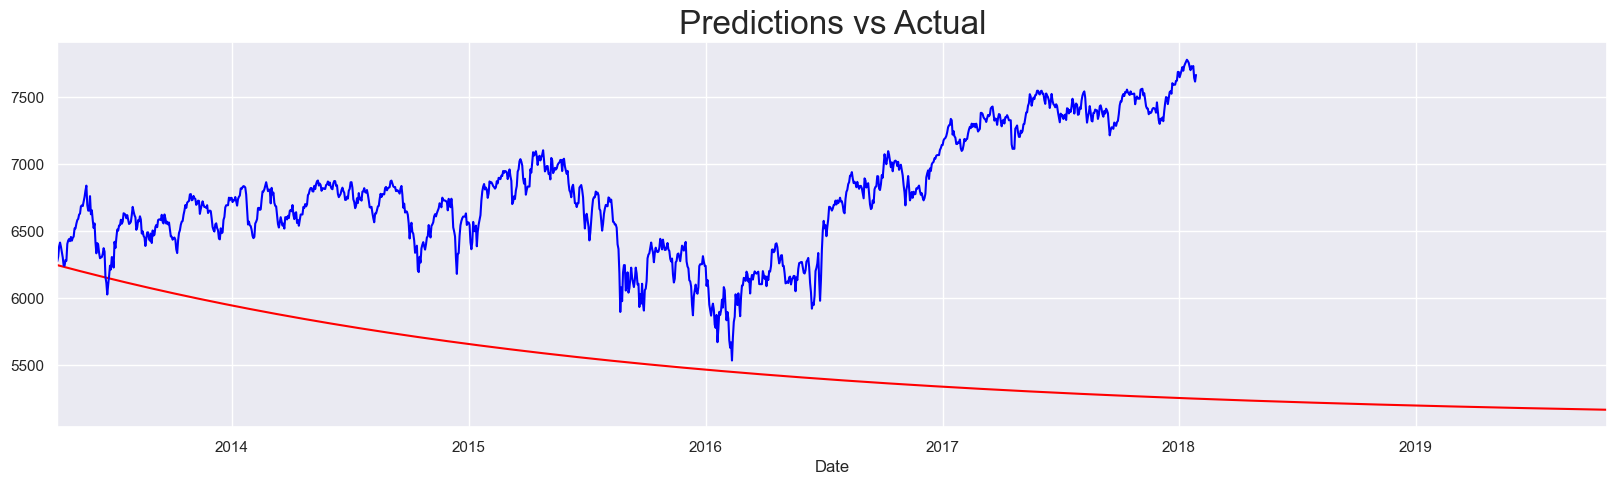

In [70]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

#### this happens with AR model because it takes only previous values to predict the nect values 

### using the returns

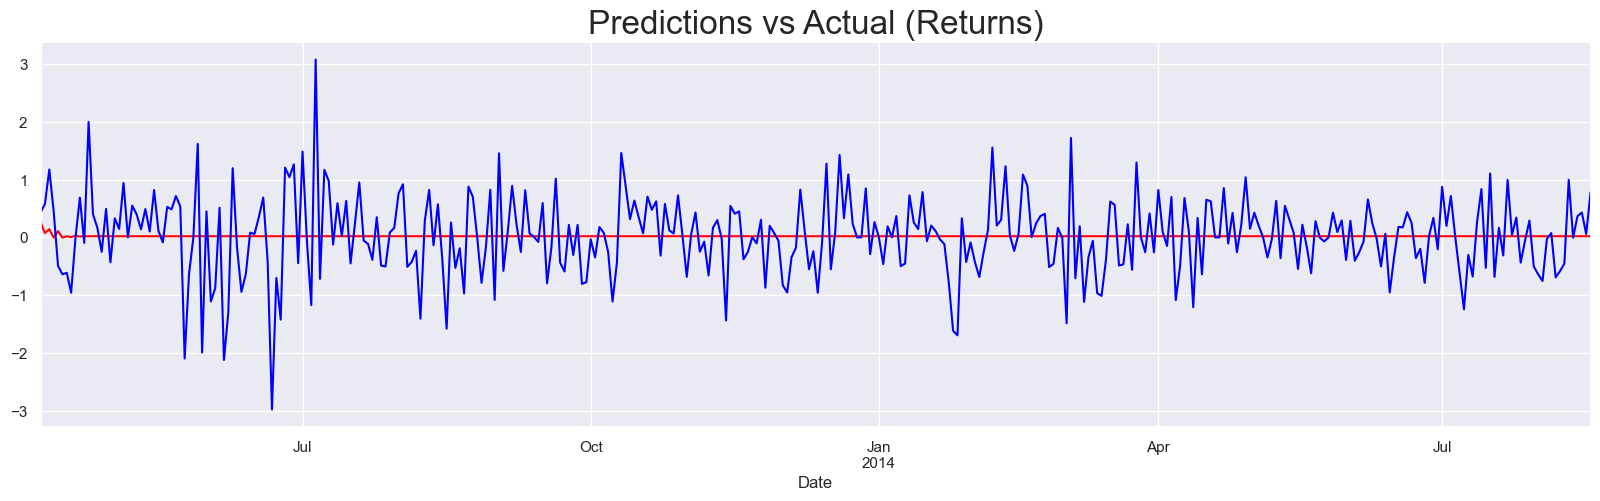

In [72]:
end_date = "2014-08-18"

model_ret_ar = ARIMA(df.ret_ftse[1:], order = (5,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end = end_date) 

df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [73]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5019
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -7891.459
Date:                Mon, 04 Mar 2024   AIC                          15796.918
Time:                        19:03:43   BIC                          15842.565
Sample:                    01-11-1994   HQIC                         15812.913
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.277      0.202      -0.010       0.048
ar.L1         -0.0218      0.009     -2.398      0.016      -0.040      -0.004
ar.L2         -0.0545      0.008     -6.835      0.000      -0.070      -0.039
ar.L3         -0.0833      0.008    -10.422      0.000      -0.099      -0.068
ar.L4          0.0449      0.008      5.424      0.000       0.029       0.061
ar.L5         -0.0594      0.008     -7.436      0.000      -0.075      -0.044
sigma2         1.3590      0.015     92.498      0.000       1.330       1.388
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6389.23
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# MA model forcast 

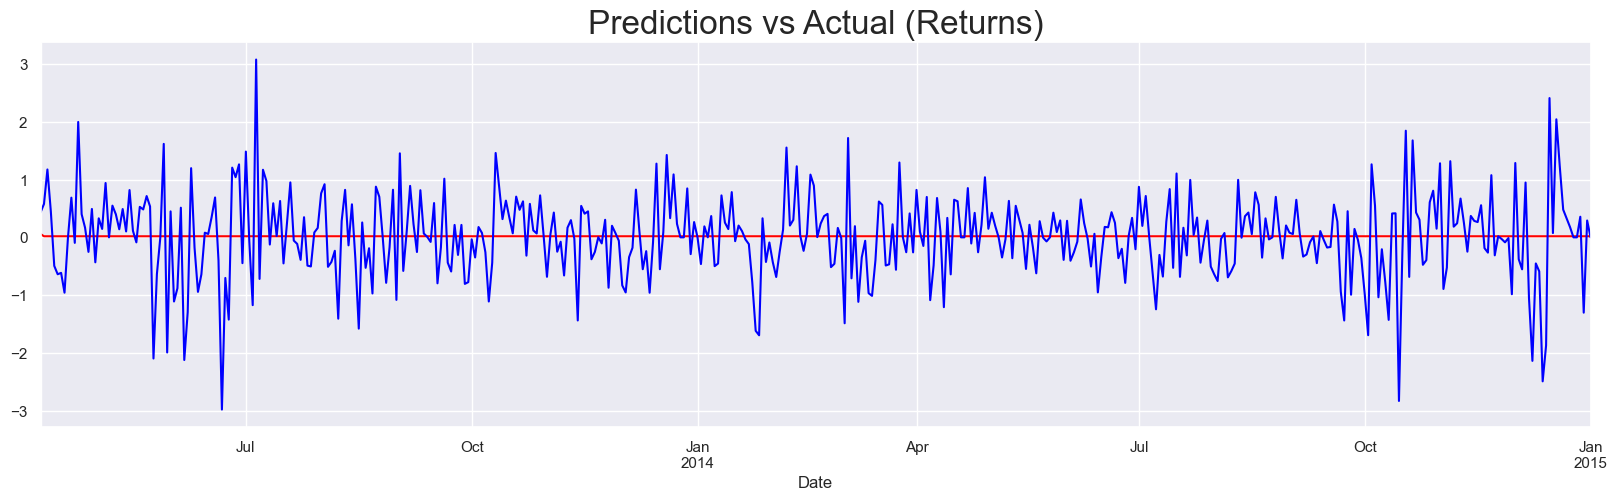

In [74]:
end_date = "2015-01-01"

model_ret_ma = ARIMA(df.ret_ftse[1:], order=(0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start = start_date, end = end_date) 

df_pred_ma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [75]:
df_pred_ma.head()

2013-04-08    0.058337
2013-04-09    0.018805
2013-04-10    0.018805
2013-04-11    0.018805
2013-04-12    0.018805
Freq: B, Name: predicted_mean, dtype: float64

# ARMA model forcast

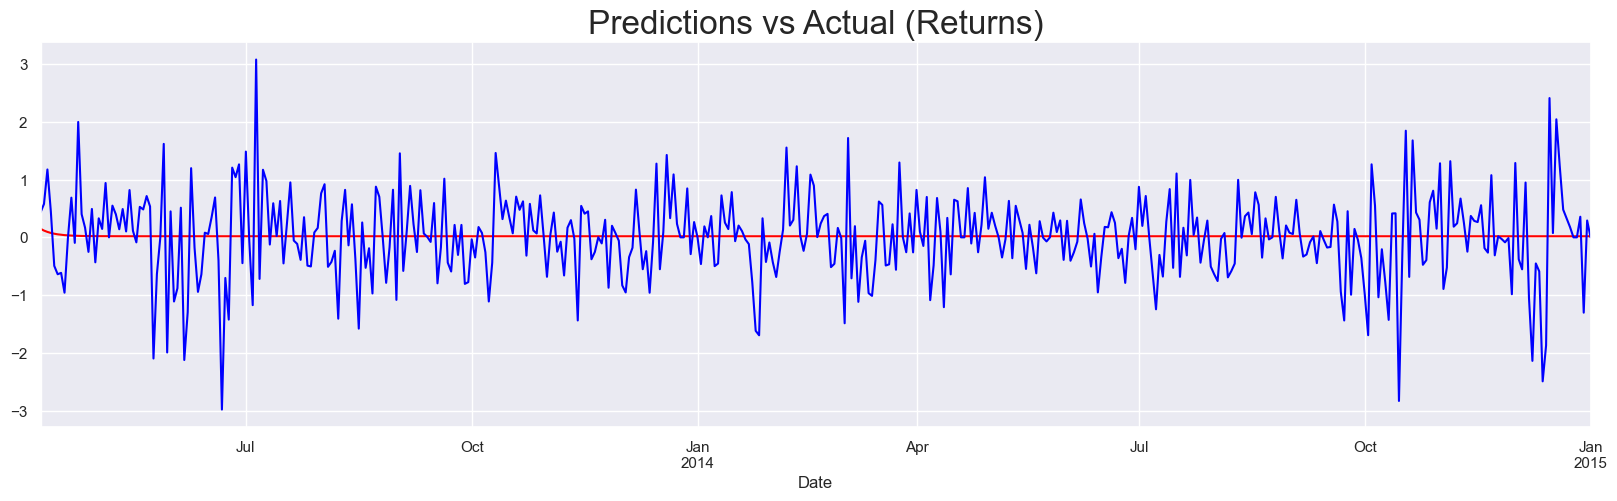

In [76]:
model_ret_arma = ARIMA(df.ret_ftse[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start = start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [77]:
df_pred_arma.head()

2013-04-08    0.147525
2013-04-09    0.117277
2013-04-10    0.094144
2013-04-11    0.076453
2013-04-12    0.062923
Freq: B, Name: predicted_mean, dtype: float64

In [78]:
df_pred_arma.tail()

2014-12-26    0.018935
2014-12-29    0.018935
2014-12-30    0.018935
2014-12-31    0.018935
2015-01-01    0.018935
Freq: B, Name: predicted_mean, dtype: float64

# ARIMAX MODEL

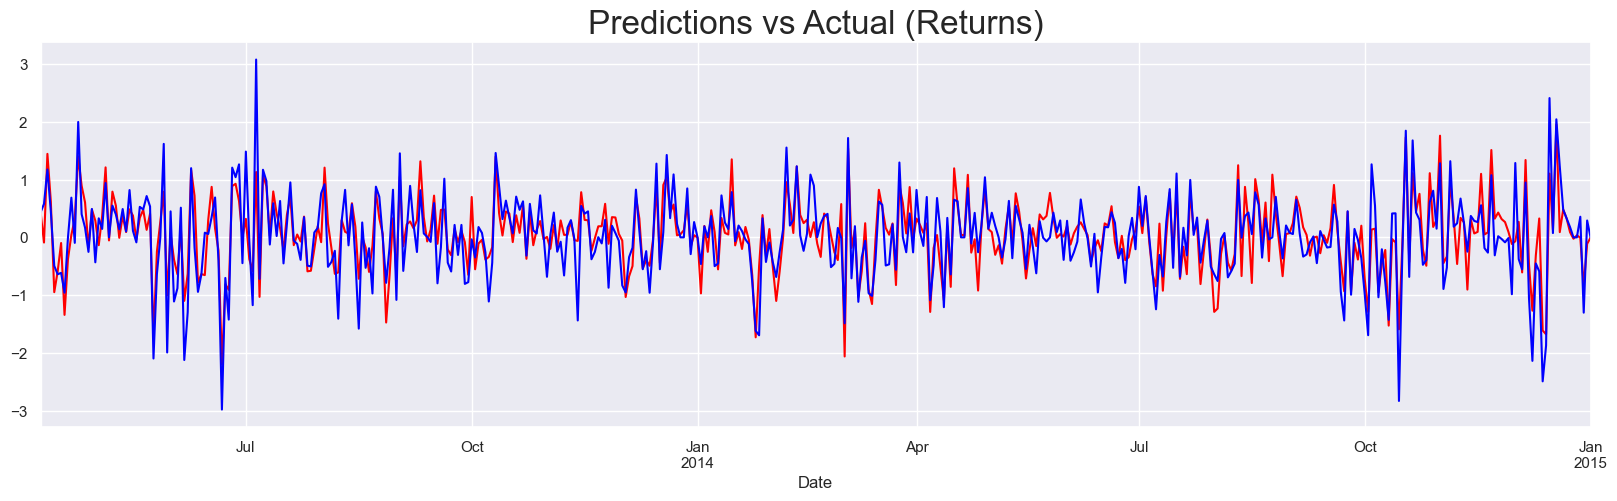

In [79]:
model_ret_armax = ARIMA(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:], order = (1,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date, 
                                          exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

## SARMA 

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

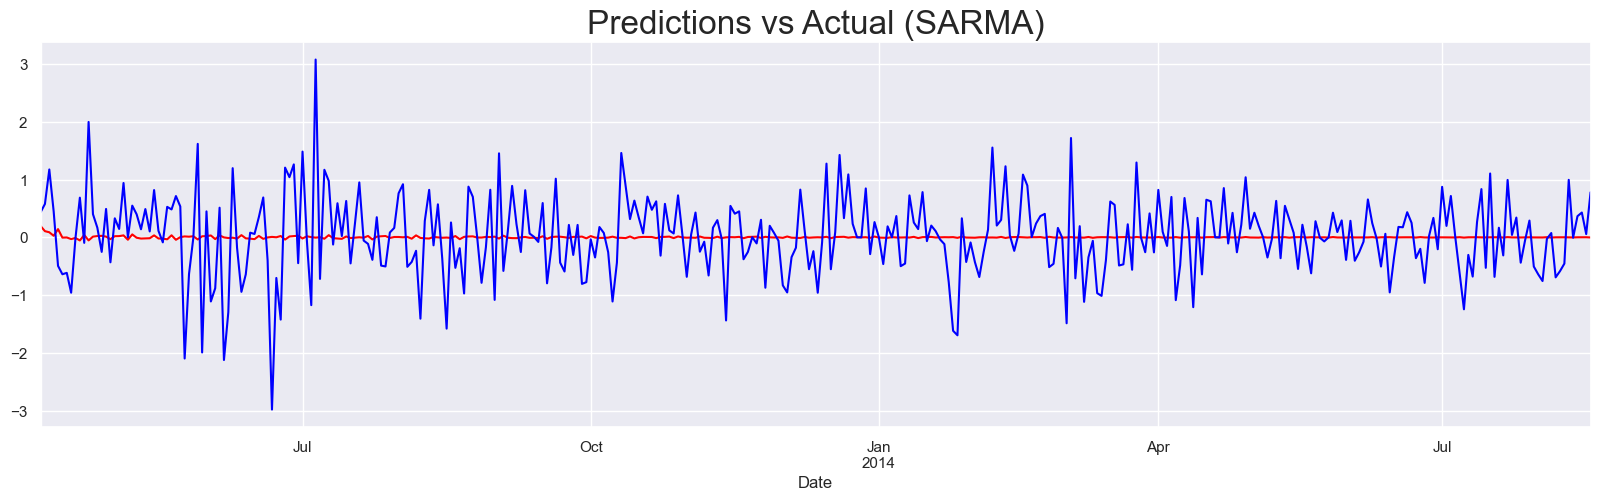

In [84]:
end_date = "2014-08-18"
model_ret_sarma = SARIMAX(df.ret_ftse[1:], order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarma = model_ret_sarma.fit()

df_pred_sarma = results_ret_sarma.predict(start = start_date, end = end_date)

df_pred_sarma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (SARMA)", size = 24)
plt.show()

# SARIMAX

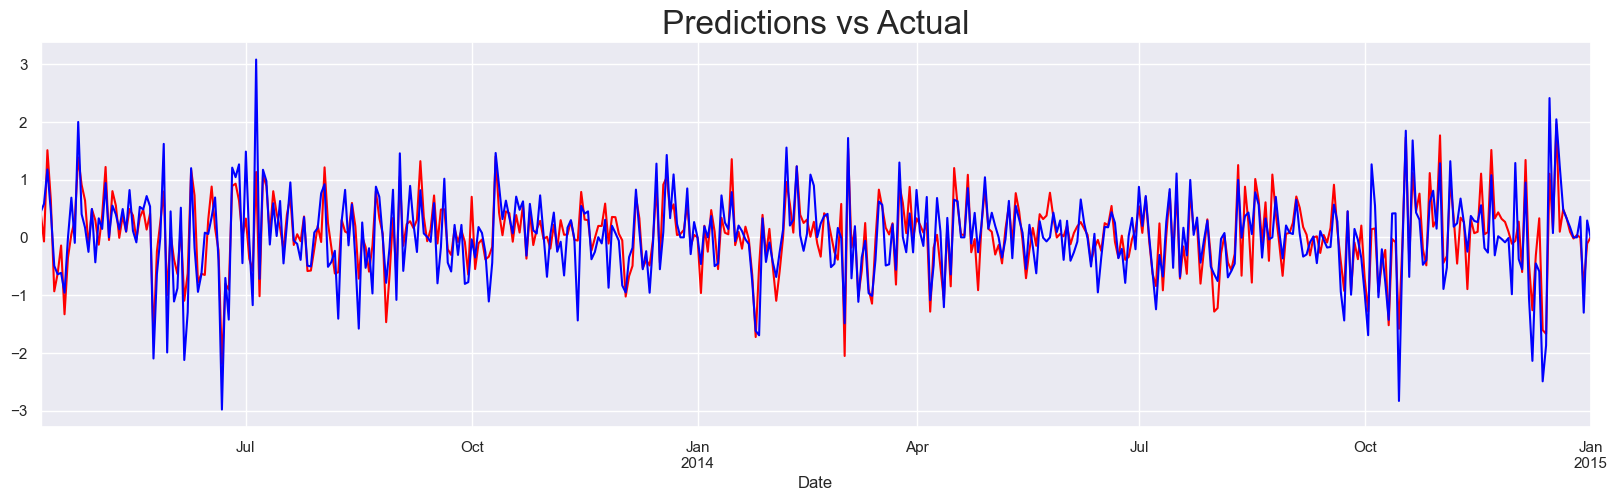

In [87]:
end_date = "2015-01-01"
model_ret_sarimax = SARIMAX(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:], 
                            order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date, 
                                              exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

In [100]:
results_ret_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               ret_ftse   No. Observations:                 5019
Model:             SARIMAX(3, 0, 4)x(3, 0, [1, 2], 5)   Log Likelihood               -5299.944
Date:                                Mon, 04 Mar 2024   AIC                          10631.887
Time:                                        22:08:49   BIC                          10736.223
Sample:                                    01-11-1994   HQIC                         10668.448
                                         - 04-05-2013                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_spx        0.1062      0.006     16.537      0.000       0.094       0.119
ret_dax        0.5463      0.006     97.960      0.000       0.535       0.557
ret_nikkei     0.0767      0.005     15.019      0.000       0.067       0.087
ar.L1          0.8990      0.168      5.365      0.000       0.571       1.227
ar.L2          0.2727      0.290      0.940      0.347      -0.296       0.841
ar.L3         -0.4041      0.220     -1.838      0.066      -0.835       0.027
ma.L1         -1.0271      0.168     -6.110      0.000      -1.357      -0.698
ma.L2         -0.1662      0.311     -0.535      0.593      -0.775       0.443
ma.L3          0.3804      0.257      1.479      0.139      -0.124       0.884
ma.L4          0.0107      0.037      0.292      0.770      -0.061       0.082
ar.S.L5        0.5340      1.018      0.524      0.600      -1.462       2.530
ar.S.L10      -0.2109      0.447     -0.472      0.637      -1.086       0.664
ar.S.L15      -0.0043      0.059     -0.072      0.943      -0.121       0.112
ma.S.L5       -0.5560      1.020     -0.545      0.586      -2.555       1.443
ma.S.L10       0.1611      0.469      0.343      0.731      -0.758       1.080
sigma2         0.4843      0.006     85.606      0.000       0.473       0.495
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9806.80
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.21
Prob(H) (two-sided):                  0.28   Kurtosis:                         9.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# AUTO ARIMA 

In [89]:
from pmdarima.arima import auto_arima

In [101]:
model_auto = auto_arima(df.ret_ftse[1:], exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                       m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)

In [102]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date]),
                            index = df_test[start_date:end_date].index) 

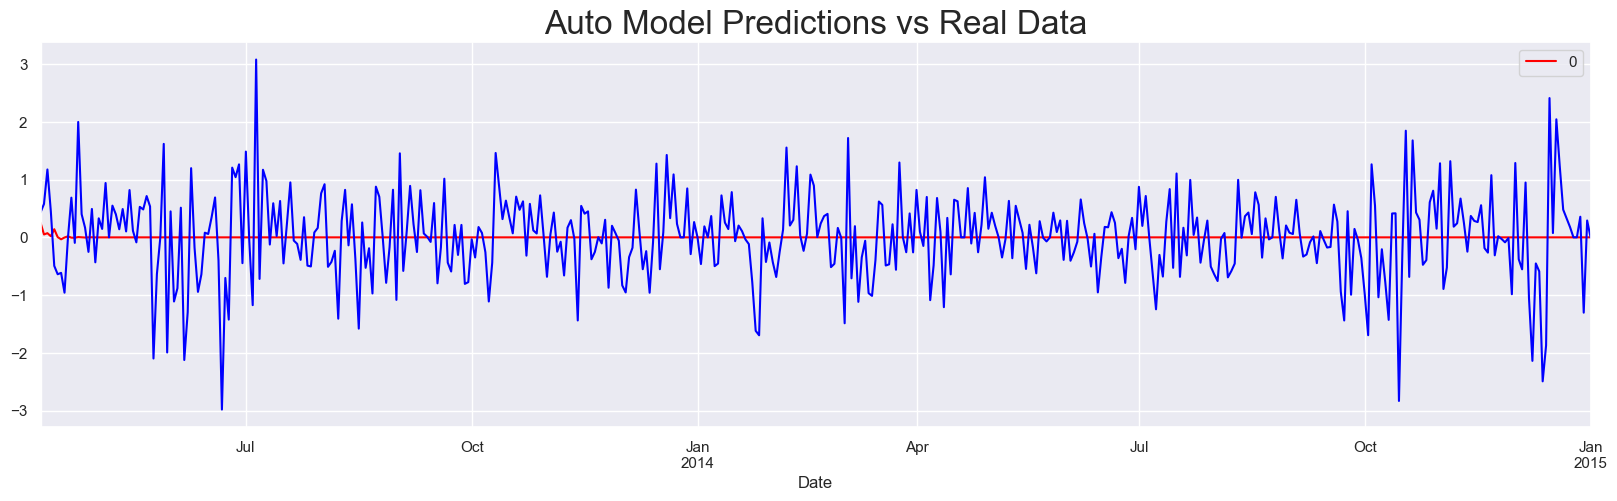

In [103]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

In [104]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 5019
Model:             SARIMAX(2, 0, 3)x(0, 0, [1], 5)   Log Likelihood               -7886.456
Date:                             Mon, 04 Mar 2024   AIC                          15786.913
Time:                                     22:38:53   BIC                          15832.560
Sample:                                 01-11-1994   HQIC                         15802.908
                                      - 04-05-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3582      0.061     -5.830      0.000      -0.479      -0.238
ar.L2         -0.4958      0.060     -8.246      0.000      -0.614      -0.378
ma.L1          0.3343      0.059      5.629      0.000       0.218       0.451
ma.L2          0.4384      0.061      7.187      0.000       0.319       0.558
ma.L3         -0.1147      0.010    -11.988      0.000      -0.133      -0.096
ma.S.L5       -0.0751      0.010     -7.882      0.000      -0.094      -0.056
sigma2         1.3563      0.015     93.027      0.000       1.328       1.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6477.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

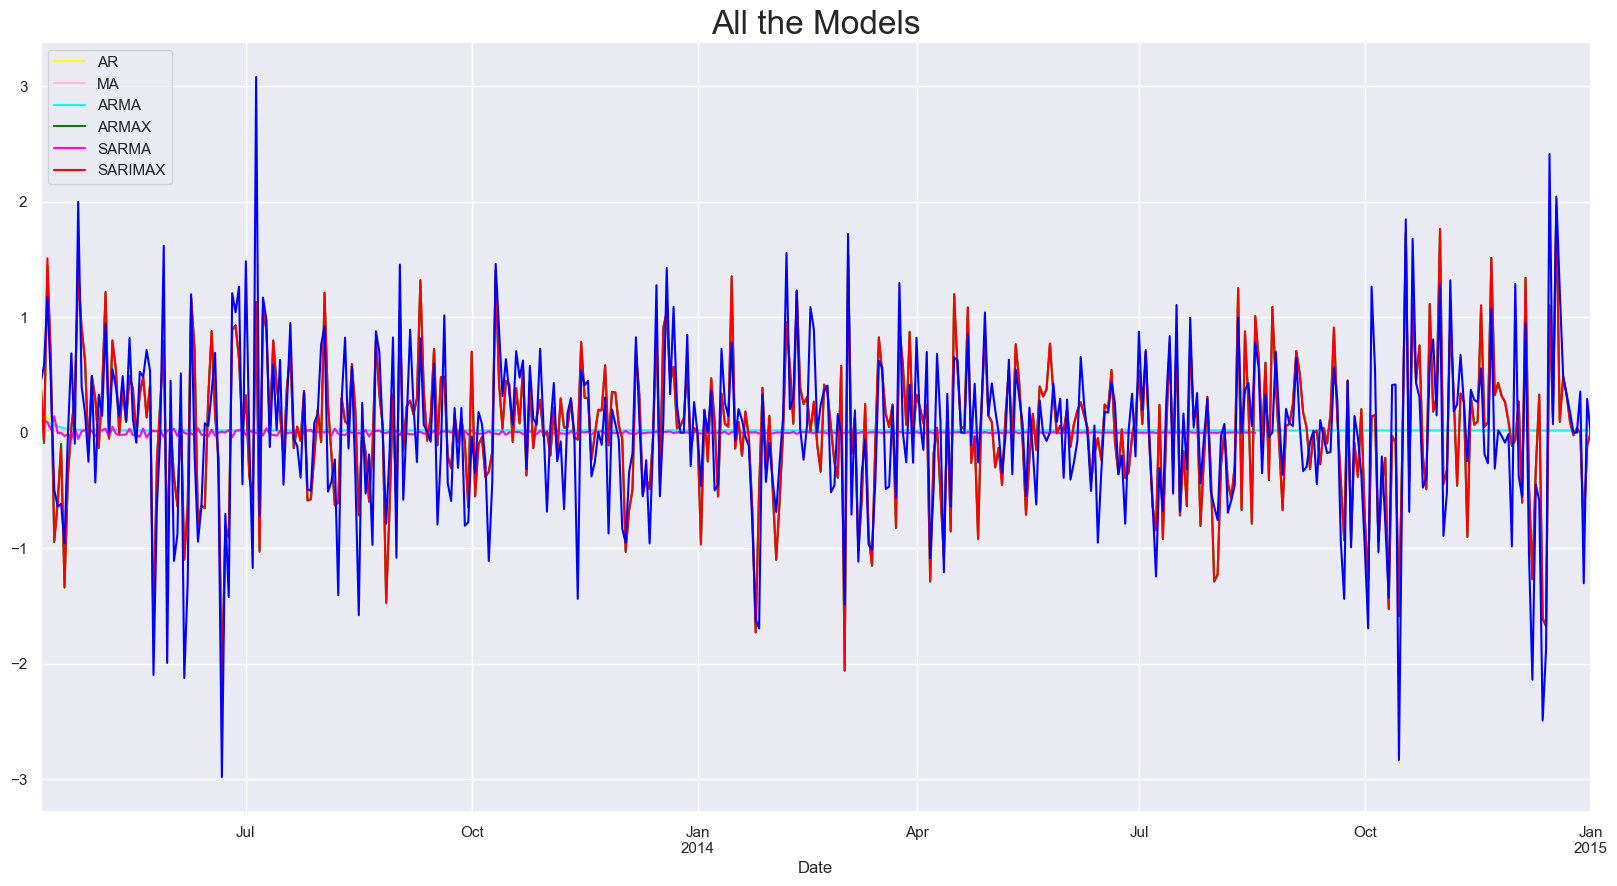

In [105]:
end_date = "2015-01-01"
df_pred_ar[start_date:end_date].plot(figsize = (20,10), color = "yellow")
df_pred_ma[start_date:end_date].plot(color = "pink")
df_pred_arma[start_date:end_date].plot(color = "cyan")
df_pred_armax[start_date:end_date].plot(color = "green")
df_pred_sarma[start_date:end_date].plot(color = "magenta")
df_pred_sarimax[start_date:end_date].plot(color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.legend(['AR','MA','ARMA','ARMAX','SARMA','SARIMAX'])
plt.title("All the Models", size = 24)
plt.show()

# FORCASTING VOLATILITY

In [106]:
mod_garch = arch_model(df_comp.ret_ftse[1:], vol = "GARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
res_garch = mod_garch.fit(last_obs = start_date, update_freq = 10)

Iteration:     10,   Func. Count:     64,   Neg. LLF: 6969.541857765137
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6969.541746399343
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


In [107]:
pred_garch = res_garch.forecast(horizon = 1, align = 'target')

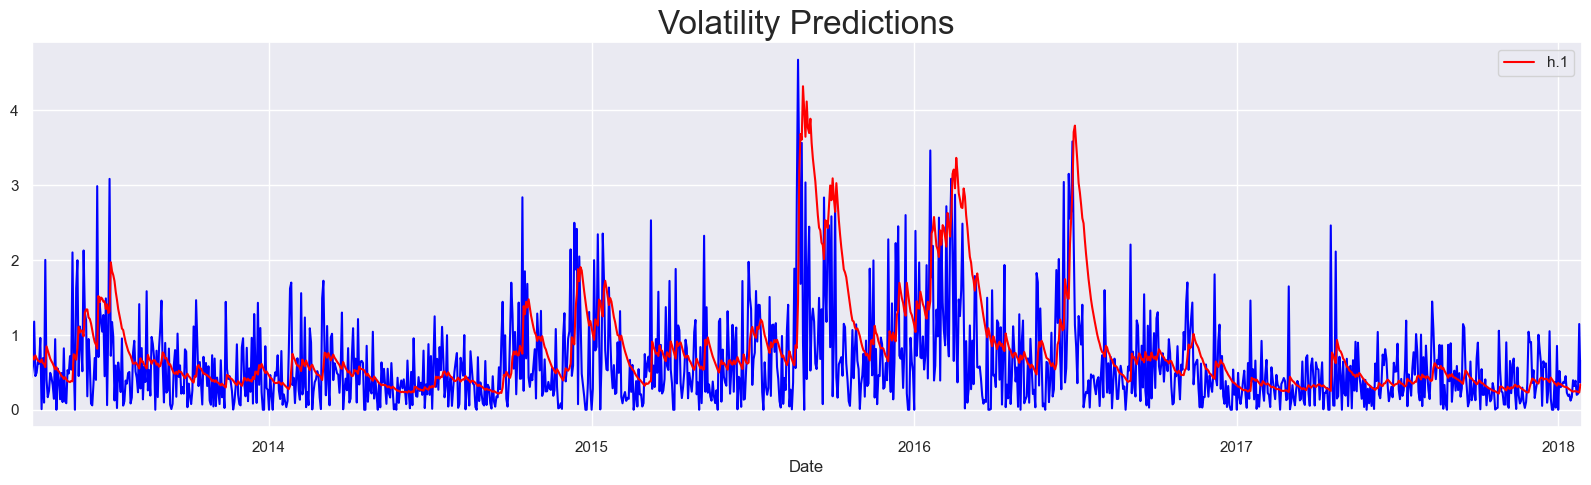

In [108]:
pred_garch.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 2)
df_test.ret_ftse.abs().plot(color = "blue", zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.show()

In [109]:
pred_garch = res_garch.forecast(horizon = 100, align = 'target')
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-26,0.332065,0.3464,0.248185,0.265514,0.280543,0.291128,0.300432,0.304315,0.320393,0.338613,...,0.921835,0.939374,0.958783,0.976895,0.988969,0.954022,0.910991,0.920971,0.934047,0.941585


# Multivariate reggression model

In [110]:
from statsmodels.tsa.api import VAR

In [111]:
df_ret = df[['ret_spx', 'ret_dax', 'ret_ftse', 'ret_nikkei']][1:]

In [112]:
model_var_ret = VAR(df_ret)
model_var_ret.select_order(20)
results_var_ret = model_var_ret.fit(ic = 'aic')

In [113]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Mar, 2024
Time:                     23:26:07
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.449050
Nobs:                     5014.00    HQIC:                  0.378098
Log likelihood:          -29226.2    FPE:                    1.40470
AIC:                     0.339820    Det(Omega_mle):         1.38141
--------------------------------------------------------------------
Results for equation ret_spx
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.035802         0.017040            2.101           0.036
L1.ret_spx           -0.112462         0.018140           -6.200           0.000
L1.ret_dax            0.064253         0.019679           

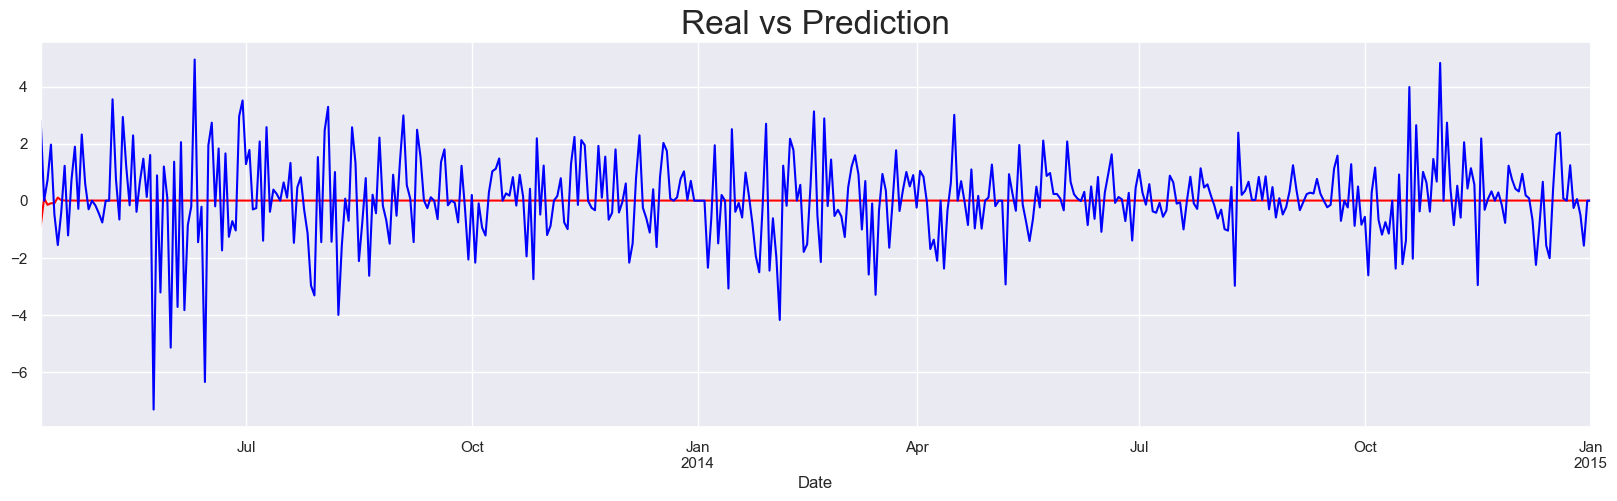

In [114]:
lag_order_ret = results_var_ret.k_ar
var_pred_ret = results_var_ret.forecast(df_ret.values[-lag_order_ret:], len(df_test[start_date:end_date]))

df_ret_pred = pd.DataFrame(data = var_pred_ret, index = df_test[start_date:end_date].index,
                                columns = df_test[start_date:end_date].columns[4:8])

df_ret_pred.ret_nikkei[start_date:end_date].plot(figsize = (20,5), color = "red")

df_test.ret_nikkei[start_date:end_date].plot(color = "blue")
plt.title("Real vs Prediction", size = 24)
plt.show()

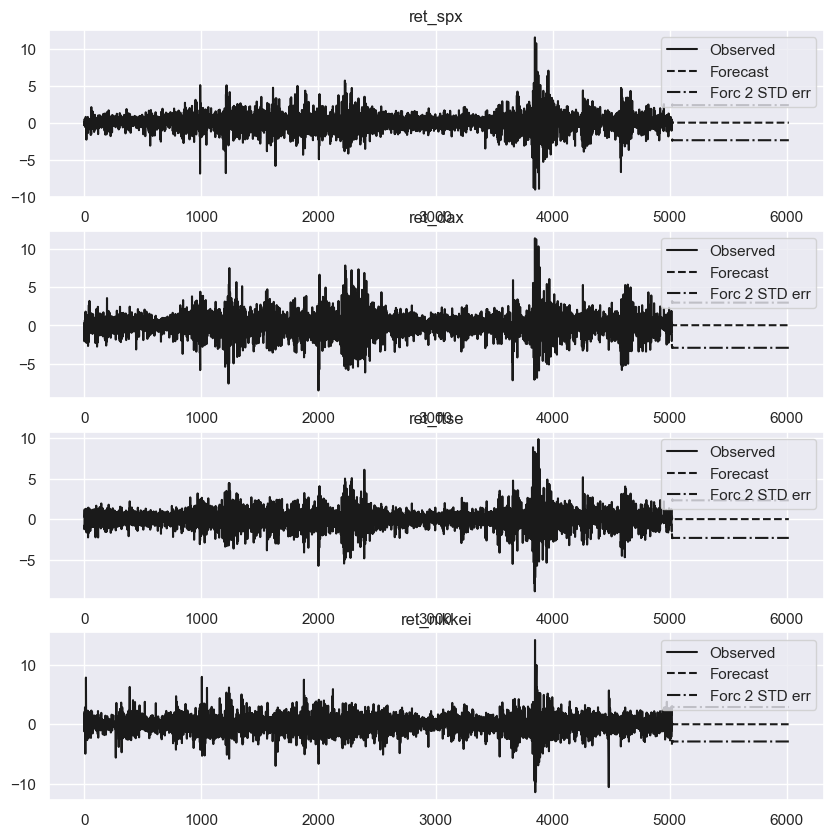

In [115]:
results_var_ret.plot_forecast(1000)
plt.show()